In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [2]:
def f(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)


In [3]:
def export_data(t_values, summed_values, n_photons, lambda_rate):
    # Create 'combined' directory if it doesn't exist
    if not os.path.exists(f'photons_lambda{lambda_rate}'):
        os.makedirs(f'photons_lambda{lambda_rate}')
    
    filename = f"photons_lambda{lambda_rate}/photon_data_{n_photons}_photons_lambda{lambda_rate}.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

# Generador de Muones cortos con un $\lambda = 0.1$

Las caracteristicas de la función short es un $\lambda=0.1$, que el linspace temporal esta hecho solo hasta 150ns xq es innecesario hacer más y que los archivos generados lo llama ..._short

In [4]:
def simulate_photon_data_short(n_photons):
    lambda_rate = 0.1 # Rate parameter for the exponential distribution -> esto es lo que lo hace corto
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 150, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = f(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data(t_values, summed_values, n_photons, lambda_rate)

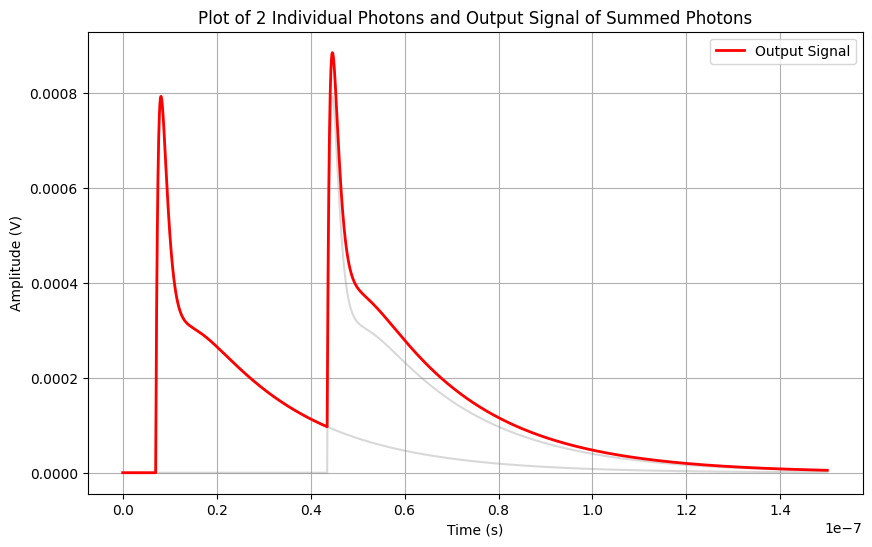

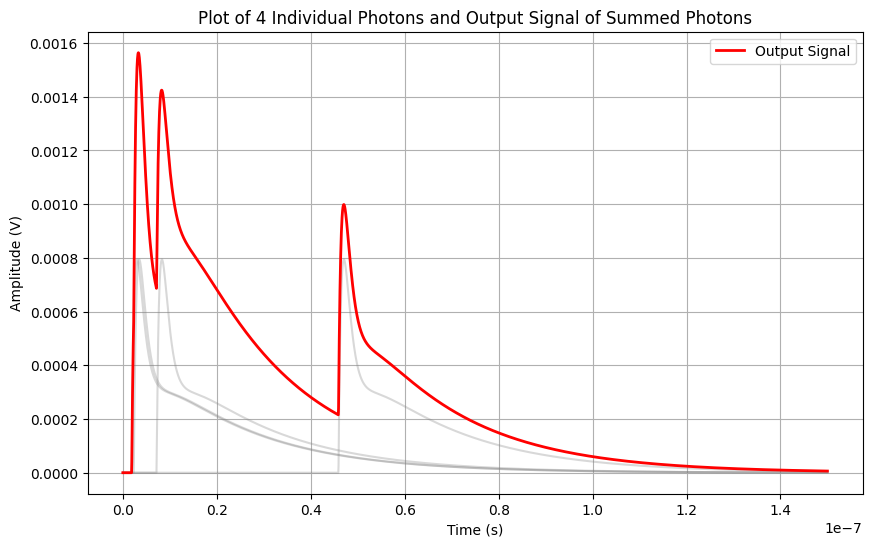

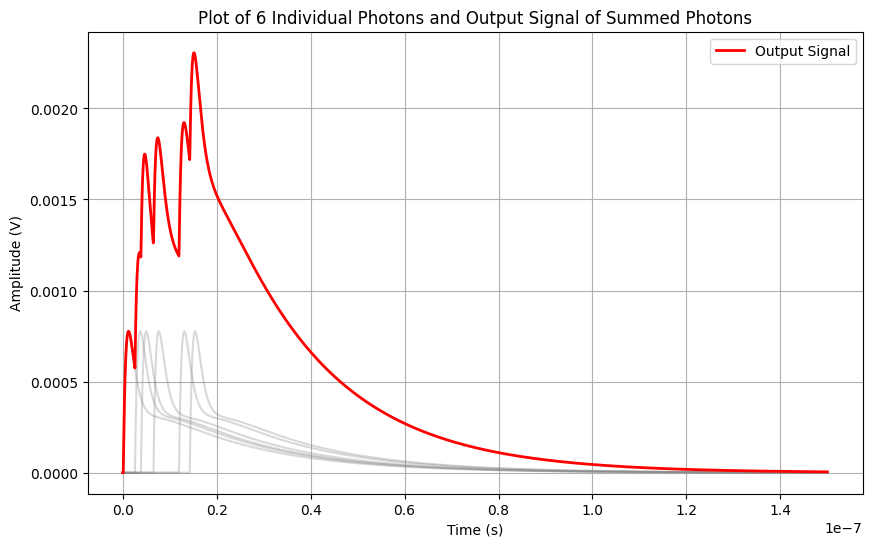

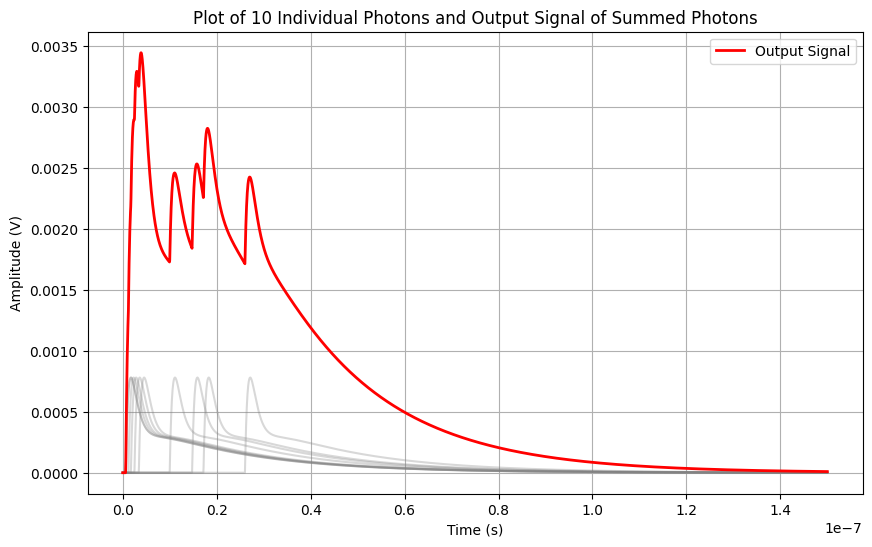

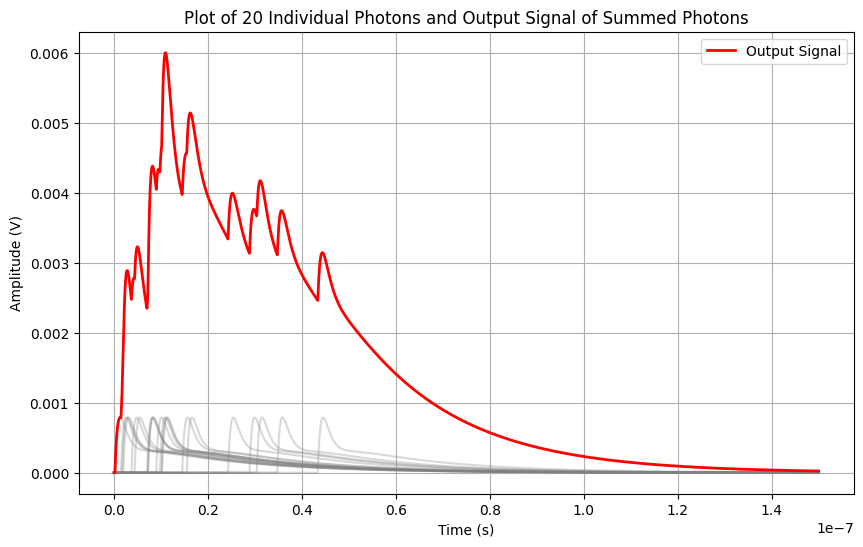

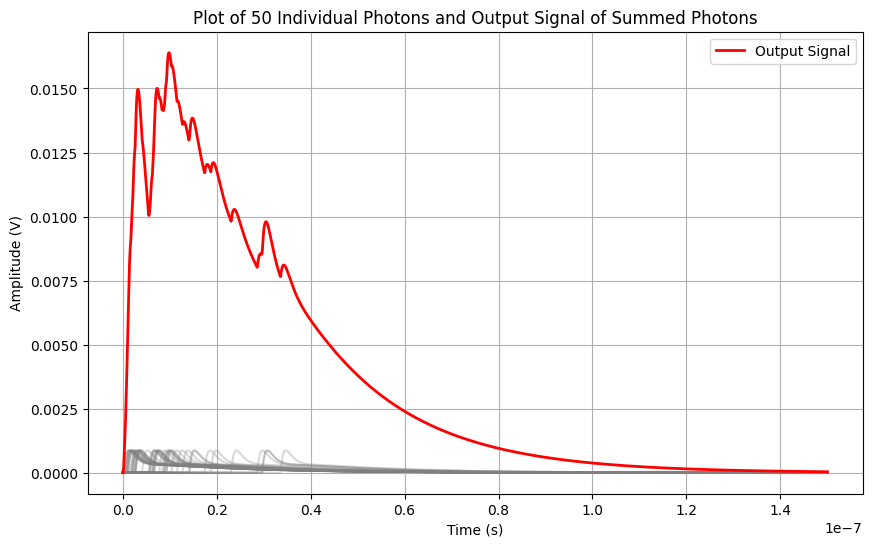

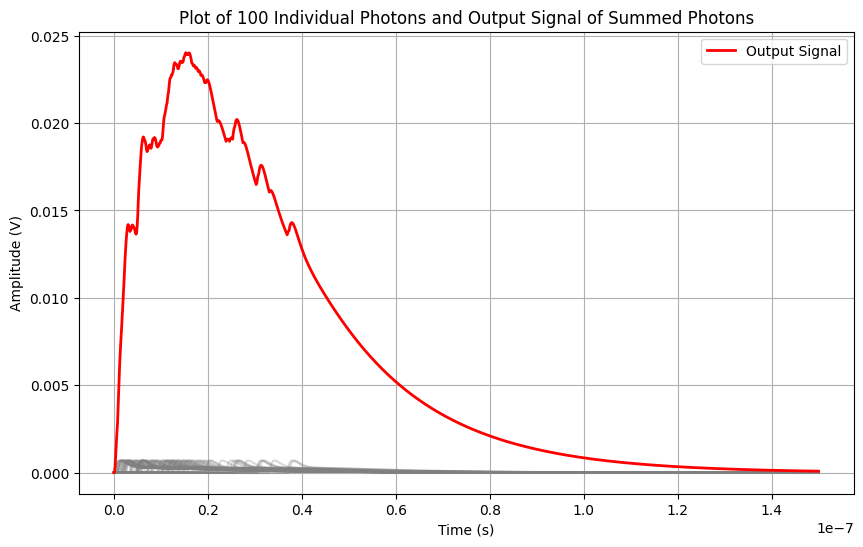

In [5]:
# Generate and export data for different numbers of photons
photons_list_short = [2, 4, 6, 10, 20, 50, 100]  # Example numbers of photons
for n in photons_list_short:
    simulate_photon_data_short(n)


# Generador de Muones largos con $\lambda = 0.01$

Las caracteristicas de la función long es un $\lambda=0.01$, que el linspace temporal esta hecho alagrado hasta 700ns xq ahora la nueva distr de probabilidad de la cual sampleo los offsets temporales es más larga y que los archivos generados lo llama ..._long

In [6]:
def simulate_photon_data_long(n_photons):
    lambda_rate = 0.01 # Rate parameter for the exponential distribution
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 700, 5000) # Aca modifico un poco el linspace xq como estan más espaciados lo fotones, se me van del plot
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = f(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data(t_values, summed_values, n_photons, lambda_rate)

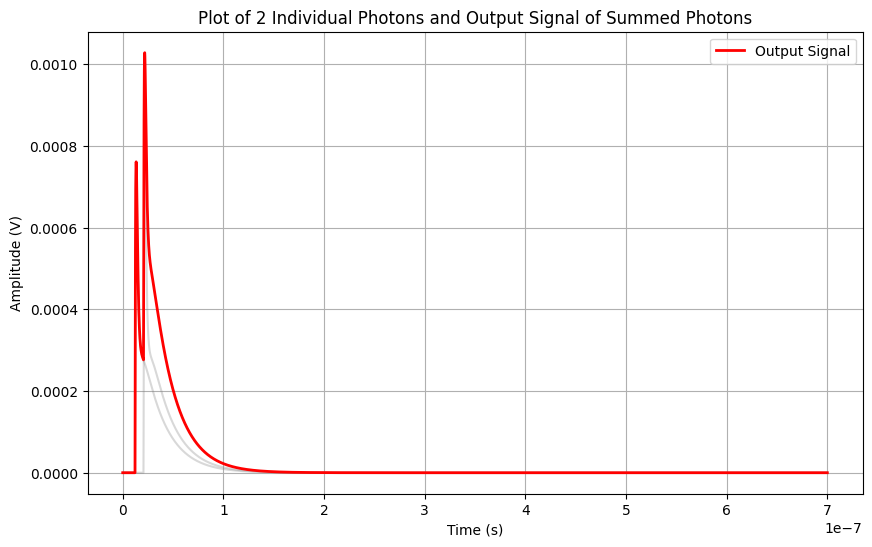

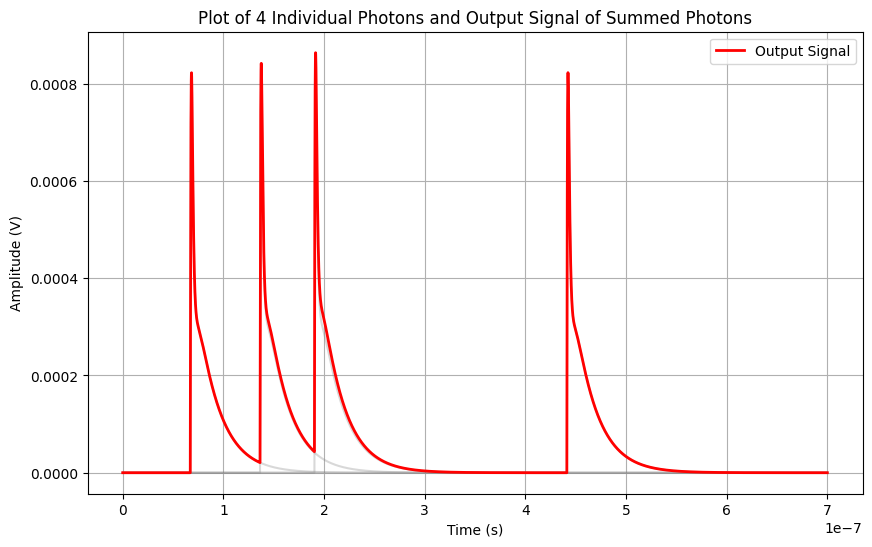

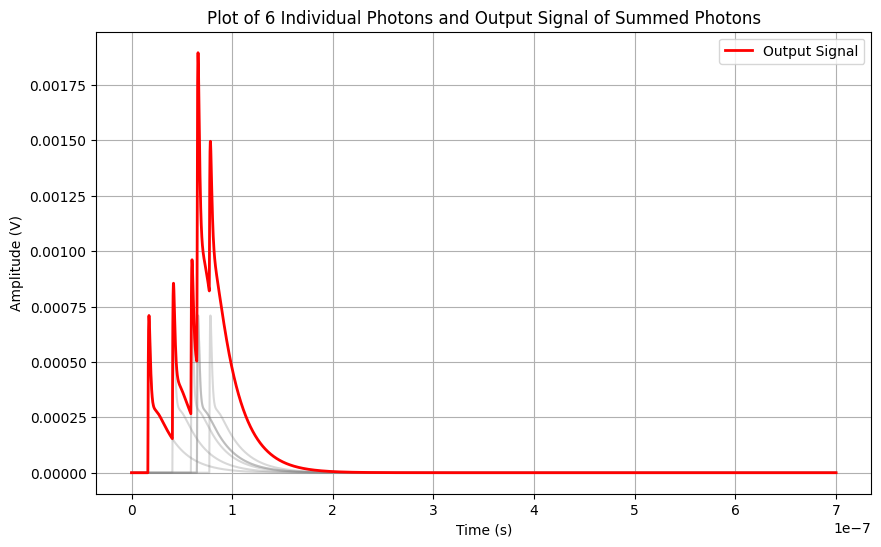

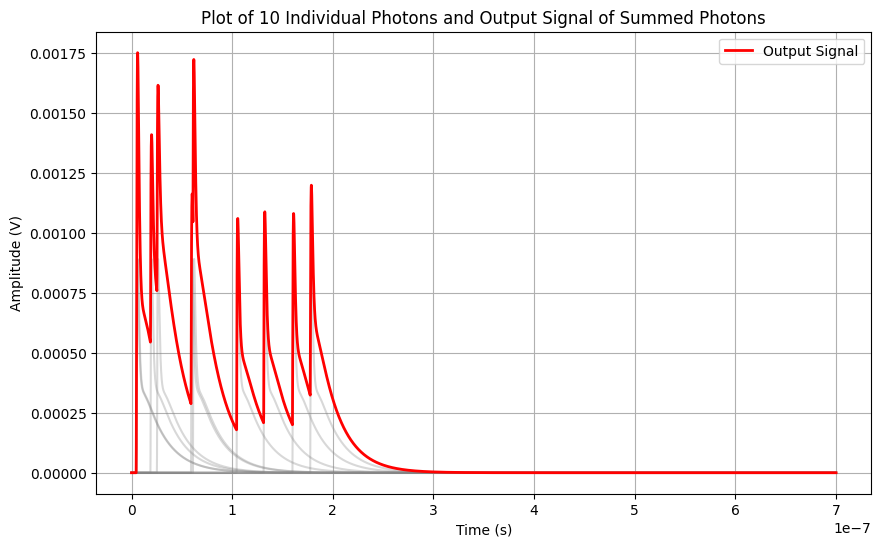

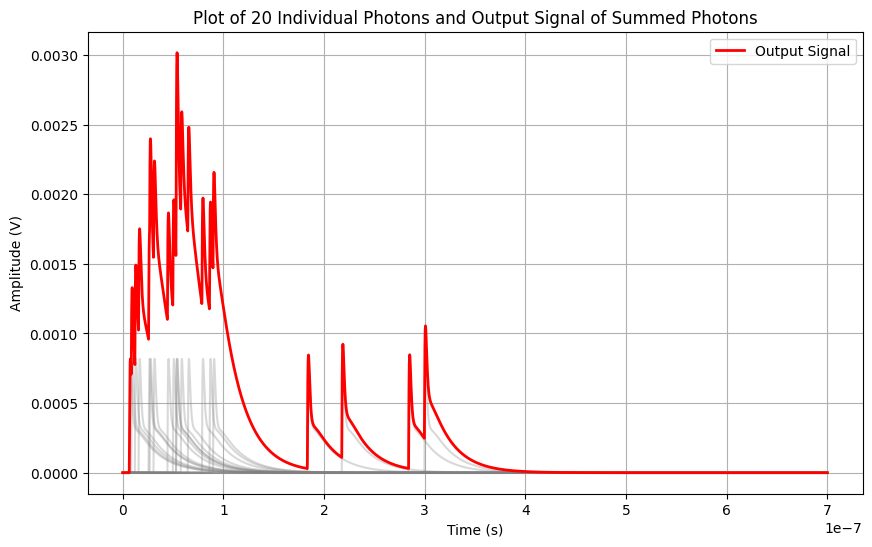

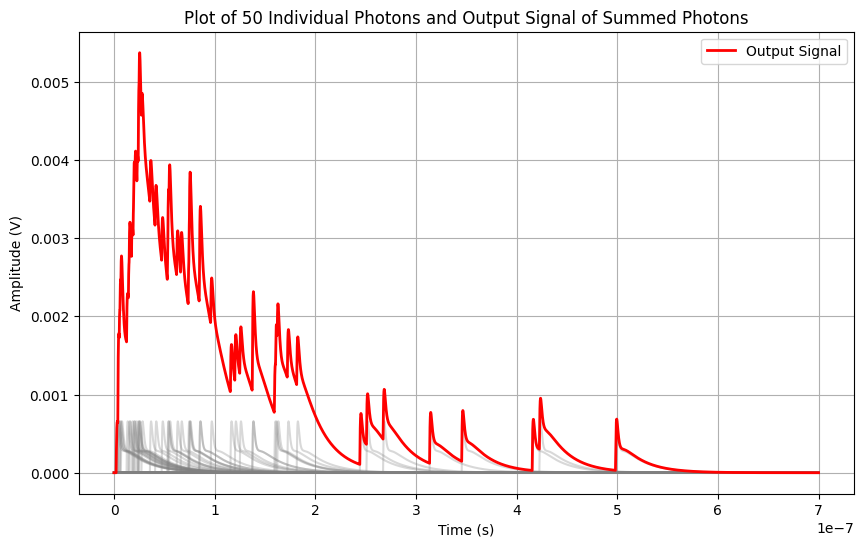

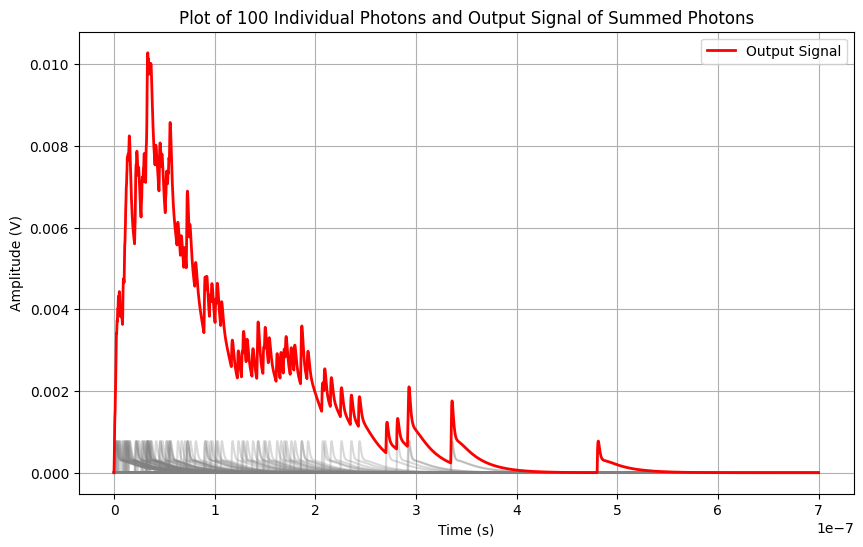

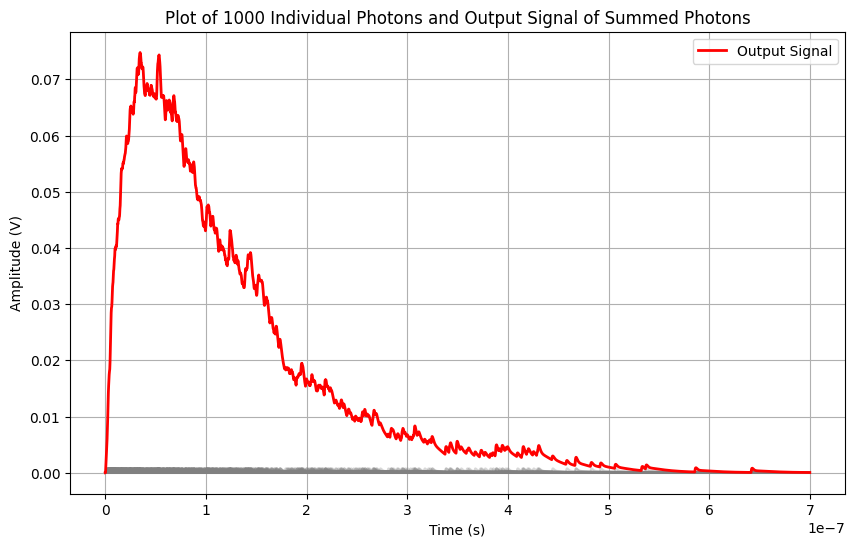

In [7]:
# Generate and export data for different numbers of photons
photons_list_long = [2, 4, 6, 10, 20, 50, 100, 1000]  # Example numbers of photons
for n in photons_list_long:
    simulate_photon_data_long(n)

# Generador de señales de n-Fotoequivalentes (PEs)

Aca busco generar señales de 1, 2 y 3 Fotoequivalentes (la diferencia con lo anterior es que los fotones no tienen offset temporal) para poder hacer el análisis de donde deberia poner el V del threshold del discriminador. Modifico los nombres de los archivos a ..._{n}_photoequivalent, directamente multiplico la señal de 1PE por la cantidad que quiero simular.

In [6]:
def export_data_photoequivalent(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photoequivalent.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_photoequivalent(n_photons):
    t_values = np.linspace(0, 100, 1500)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    data = n_photons*f(t_values, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
    
    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting function
    plt.plot(t_values, data, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_photoequivalent(t_values, data, n_photons)

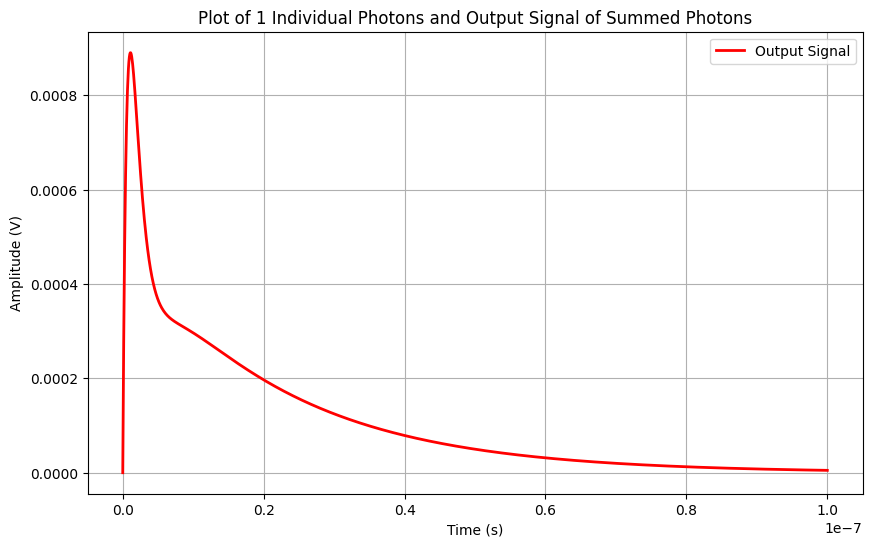

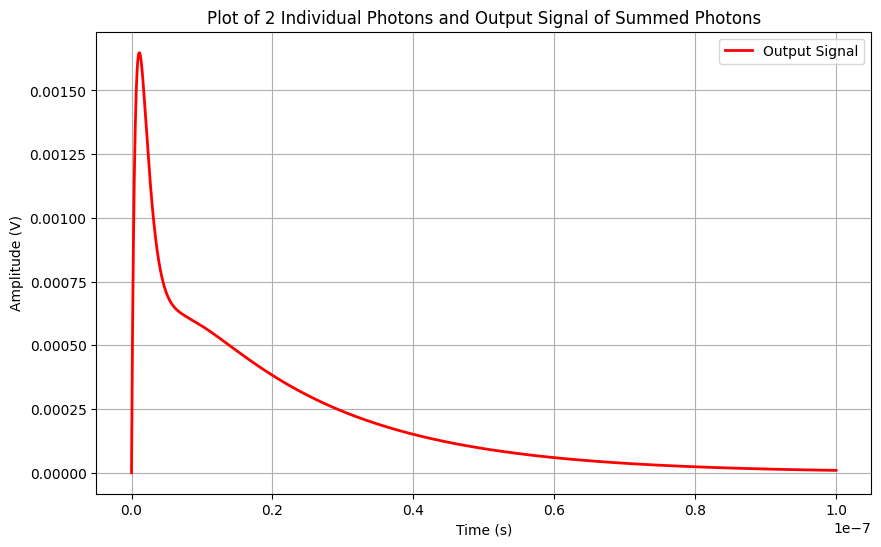

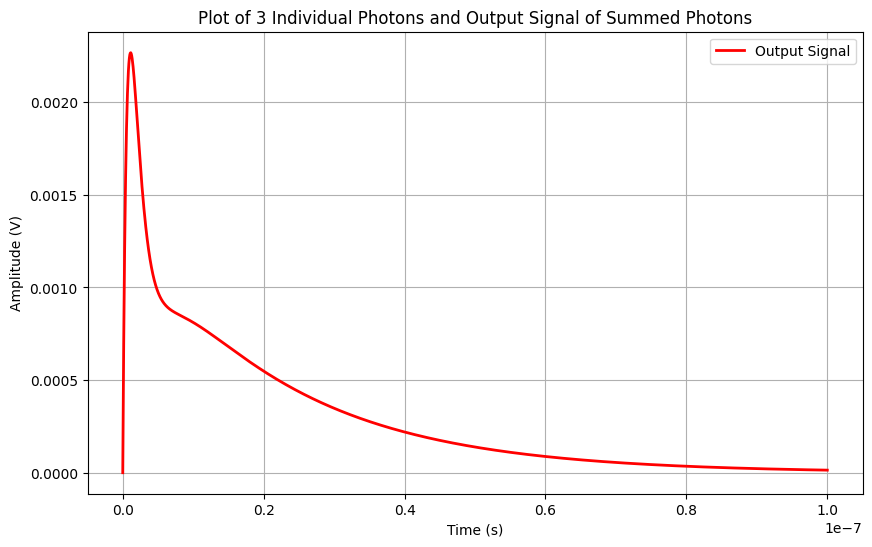

In [7]:
# Generate and export data for different numbers of photons
photons_list_photoequivalent = [1, 2, 3]  # Example numbers of photons
for n in photons_list_photoequivalent:
    simulate_photon_data_photoequivalent(n)